In [2]:
%matplotlib inline

In [3]:

# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from matplotlib.pyplot import figure
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
# File to Load (Remember to change these)
city_data_to_load = "city_data.csv"
ride_data_to_load = "ride_data.csv"

city_df = pd.read_csv(city_data_to_load)
ride_df = pd.read_csv(ride_data_to_load)

# Read the City and Ride Data
df = pd.read_csv('ride_data.csv').merge(pd.read_csv('city_data.csv'))
df_merged = ride_df.merge(city_df, how='left')
df_merged.to_excel("output.xlsx")

# Display the data table for preview

df_merged.head(5)

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


In [4]:
urban = df_merged.set_index(df_merged['type']).loc['Urban']

se guardan los tipos "urban suburban etc"
se calcula el total de los viajes hechos por ciudad
se calcula el promedio de cobro

city
Bradshawfurt         10
Garzaport             3
Harringtonfort        6
Jessicaport           6
Lake Jamie            6
Lake Latoyabury      11
Michaelberg          12
New Ryantown          6
Newtonview            4
North Holly           9
North Jaime           8
Penaborough           5
Randallchester        5
South Jennifer        7
South Marychester     8
South Saramouth       4
Taylorhaven           6
West Heather          9
Name: city, dtype: int64

(19, 44)

(0, 41)

Text(0.5, 1.0, 'Pyber Ride Sharing Data (2016)')

Text(0.5, 0, 'Total Number of Rides(Per City)')

Text(0, 0.5, 'Average Fare ($)')

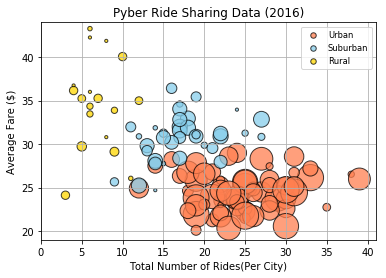

In [5]:

#urban average fares y_axis
urban = df_merged[(df_merged['type'] == 'Urban')]
urban = urban.groupby(['city'])
urban_fare_avg = urban['fare'].mean()
#urban total rides x_axis
urban_total_rides = urban['city'].count()
#axis
x_urban = urban_total_rides
y_urban = urban_fare_avg
#a
urban_total_drivers = urban['driver_count'].min()


#suburban average fares y_axis
suburban = df_merged.loc[(df_merged['type'] == 'Suburban')]
suburban = suburban.groupby(['city'])
suburban_fare_avg = suburban['fare'].mean()
#suburban total rides x_axis
suburban_total_rides = suburban['city'].count()

#axis
x_suburban = suburban_total_rides
y_suburban = suburban_fare_avg

suburban_total_drivers = suburban['driver_count'].min()

#rural average fares y_axis
rural = df_merged.loc[(df_merged['type'] == 'Rural')]
rural = rural.groupby(['city'])
rural_fare_avg = rural['fare'].mean()
#suburban total rides x_axis
rural_total_rides = rural['city'].count()
#axis
x_rural = rural_total_rides
y_rural = rural_fare_avg

#
rural_total_drivers = rural['driver_count'].min()

x_rural

#axis limits
plt.ylim(19, 44)
plt.xlim(0,41)

plt.scatter(x_urban, y_urban, marker="o", facecolors="Coral", edgecolors="black", 
            s=urban_total_drivers*10, alpha=0.75, label='Urban')
plt.scatter(x_suburban, y_suburban, marker="o", facecolors="SkyBlue", edgecolors="black", 
            s=suburban_total_drivers*10, alpha=0.75, label ='Suburban')
plt.scatter(x_rural, y_rural, marker="o", facecolors="Gold", edgecolors="black", 
            s=rural_total_drivers*10, alpha=0.75, label ='Rural')
legend = plt.legend(loc="best", fontsize='small', mode='expanded',numpoints=1, scatterpoints=1)
legend.legendHandles[0]._sizes = [30]
legend.legendHandles[1]._sizes = [30]
legend.legendHandles[2]._sizes = [30]
plt.grid()

plt.title('Pyber Ride Sharing Data (2016)')
plt.xlabel('Total Number of Rides(Per City)')
plt.ylabel('Average Fare ($)')

## Bubble Plot of Ride Sharing Data

## Total Fares by City Type

([<matplotlib.patches.Wedge at 0x11f755e80>,
 [Text(1.169693147981355, 0.26798869298063277, 'Urban'),
  Text(-0.8183497488822089, 0.735053527645726, 'Rural'),
  Text(-0.9955955489328239, -0.46774940186509, 'Suburban')],
 [Text(0.6823210029891238, 0.15632673757203577, '62.7%'),
  Text(-0.44637259029938664, 0.40093828780675955, '6.8%'),
  Text(-0.543052117599722, -0.2551360373809582, '30.5%')])

(-1.1112563362116055,
 1.2148058462589555,
 -1.0924589717218391,
 1.1366907384688834)

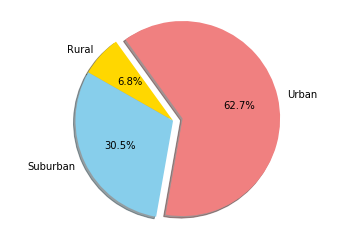

In [70]:
# Calculate Type Percents
total_fares = df_merged['fare'].sum()
urban_fares = (urban['fare'].sum()).sum() / total_fares * 100
suburban_fares = (suburban['fare'].sum()).sum() / total_fares * 100
rural_fares = (rural['fare'].sum()).sum() / total_fares * 100

# Build Pie Chart
total_fa = [urban_fares,rural_fares,suburban_fares]
types = ['Urban','Rural','Suburban']
explode = [0.1,0,0]
colors = ['LightCoral','Gold','SkyBlue']

plt.pie(total_fa, explode=explode, labels=types, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=260,)
# Save Figure
plt.axis("equal")

In [6]:
# Show Figure
plt.show()

## Total Rides by City Type

68.42105263157895

([<matplotlib.patches.Wedge at 0x11f8bef28>,
 [Text(1.1033094885454109, 0.4719196674071382, 'Urban'),
  Text(-1.0032493053238525, 0.4510995803225798, 'Rural'),
  Text(-0.9263707884205817, -0.5931586317006858, 'Suburban')],
 [Text(0.6435972016514897, 0.2752864726541639, '68.4%'),
  Text(-0.5472268938130104, 0.24605431653958892, '5.3%'),
  Text(-0.5052931573203173, -0.3235410718367377, '26.3%')])

(-1.1151552225377388,
 1.2128331839959388,
 -1.0866301662689613,
 1.1534623888620021)

Text(0.5, 1.0, '% of Total Rides by City Type')

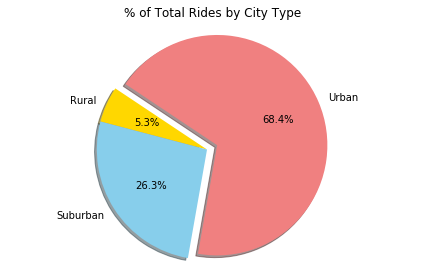

In [72]:
# Calculate Type Percents
total_types = df_merged['type'].count()
urban_riders = urban_total_rides.sum() / total_types * 100
suburban_riders = suburban_total_rides.sum() / total_types * 100
rural_riders = rural_total_rides.sum() / total_types * 100

urban_riders
# Build Pie Chart
total_riders = [urban_riders,rural_riders,suburban_riders]
types = ['Urban','Rural','Suburban']
explode = [0.1,0,0]
colors = ['LightCoral','Gold','SkyBlue']

plt.pie(total_riders, explode=explode, labels=types, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=260,)
# Save Figure
plt.axis("equal")
plt.title("% of Total Rides by City Type")
plt.tight_layout()

In [8]:
# Show Figure
plt.show()

## Total Drivers by City Type

([<matplotlib.patches.Wedge at 0x11f970518>,
 [Text(1.1942514064707843, 0.11731827710358601, 'Urban'),
  Text(-1.0044582902910995, 0.44840109619121327, 'Rural'),
  Text(-1.0821600787935866, -0.1973057623726654, 'Suburban')],
 [Text(0.6966466537746241, 0.0684356616437585, '80.9%'),
  Text(-0.5478863401587815, 0.24458241610429812, '2.6%'),
  Text(-0.5902691338874108, -0.10762132493054474, '16.5%')])

(-1.1209128734926854,
 1.2111054580470828,
 -1.0960571142968465,
 1.1158855920028157)

Text(0.5, 1.0, '% of Total Drivers by City Type')

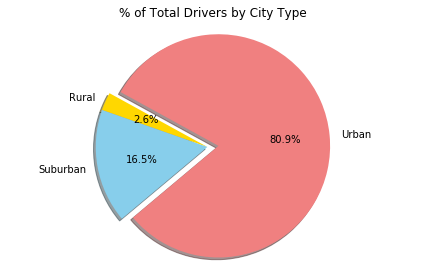

In [74]:
# Calculate Driver Percents

urban_drivers = urban['driver_count'].max().sum()
suburban_drivers = suburban['driver_count'].max().sum()
rural_drivers = rural['driver_count'].max().sum()
total_drivers = urban_drivers + suburban_drivers + rural_drivers

urban_drivers = urban_drivers / total_drivers * 100
suburban_drivers = suburban_drivers / total_drivers * 100
rural_drivers = rural_drivers / total_drivers * 100

# Build Pie Chart
total_drivers = [urban_drivers,rural_drivers,suburban_drivers]
types = ['Urban','Rural','Suburban']
explode = [0.1,0,0]
colors = ['LightCoral','Gold','SkyBlue']

plt.pie(total_drivers, explode=explode, labels=types, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=220,)
# Save Figure
plt.axis("equal")
# Build Pie Charts
plt.title("% of Total Drivers by City Type")
# Save Figure
plt.tight_layout()

# Show Figure
plt.show()

In [ ]:
´´´´´´´´´´´´´´´                                                                                                         bnm